In [ ]:
# Author: Ruta Kulkarni
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
dataPath = "/content/drive/My Drive/images_capstone/"



In [ ]:
# Take input

import numpy as np
import cv2
import os

num_images = 144
images = []
for i in range(num_images):
    img = cv2.imread(dataPath+"image"+str(i)+".png",0)
    im = cv2.resize(img,(512,512))
    images.append(list(im))
images = np.array(images)
len(images)

144

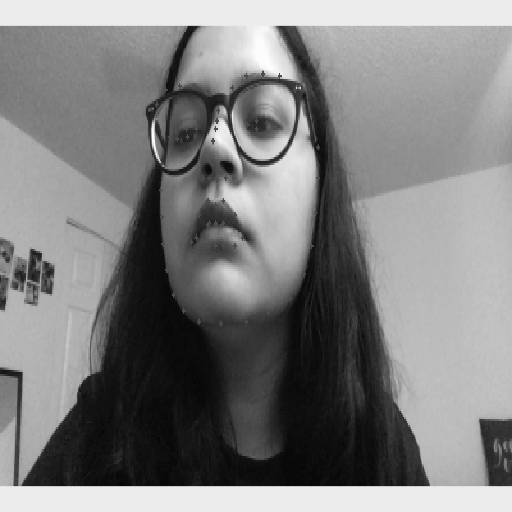

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(images[2])

In [ ]:
images = np.array(images)
images = images.reshape((144,512,512,1))
images.shape

(144, 512, 512, 1)

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(512, 512, 1))  # adapt this if using `channels_first` image data format

# output_filters = 16, kernel_size = 3*3
x = Conv2D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
print(autoencoder.summary())


Using TensorFlow backend.


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 8)       1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0   

In [ ]:
np.random.shuffle(images)
x_train = images[:108]/255
x_test = images[108:]/255


In [ ]:
# Train the model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(x_test, x_test))


Train on 108 samples, validate on 36 samples
Epoch 1/50
108/108 [==============================] - 45s 420ms/step - loss: 0.6974 - val_loss: 0.6934
Epoch 2/50
108/108 [==============================] - 44s 408ms/step - loss: 0.6931 - val_loss: 0.6923
Epoch 3/50
108/108 [==============================] - 44s 408ms/step - loss: 0.6919 - val_loss: 0.6906
Epoch 4/50
108/108 [==============================] - 46s 430ms/step - loss: 0.6898 - val_loss: 0.6867
Epoch 5/50
108/108 [==============================] - 44s 407ms/step - loss: 0.6847 - val_loss: 0.6765
Epoch 6/50
108/108 [==============================] - 44s 407ms/step - loss: 0.6704 - val_loss: 0.6475
Epoch 7/50
108/108 [==============================] - 44s 407ms/step - loss: 0.6384 - val_loss: 0.6733
Epoch 8/50
108/108 [==============================] - 44s 406ms/step - loss: 0.6529 - val_loss: 0.6208
Epoch 9/50
108/108 [==============================] - 44s 410ms/step - loss: 0.6084 - val_loss: 0.6011
Epoch 10/50
108/108 [=======

In [ ]:
encoder = Model(inputs = input_img, outputs = encoded)


In [ ]:
X_train_enc = encoder.predict(x_train)


In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

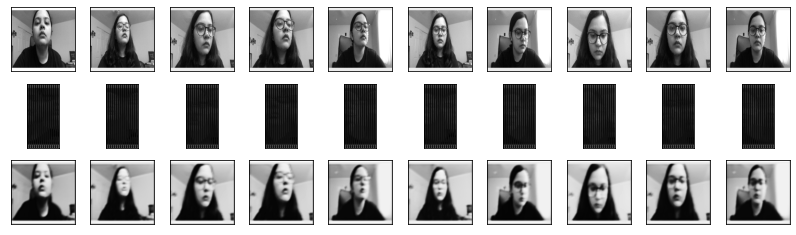

In [ ]:
# Plot the input, encoded features and the reconstructed input

import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(14, 4))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(512, 512))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(256, 128))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(512, 512))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()